In [19]:
%matplotlib notebook


In [20]:
import heapq
import numpy as np
import matplotlib.pyplot as plt

# Optional: make plots display nicely in Jupyter
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,6)


In [21]:
def dijkstra(maze, start, goal):
    """
    Dijkstra's algorithm on a 2D grid (4-neighborhood).
    maze: 2D array-like (0 = free, 1 = wall)
    start, goal: (row, col) tuples
    Returns: list of (row, col) coordinates for the shortest path (inclusive),
             or [] if no path exists.
    """
    rows, cols = len(maze), len(maze[0])
    directions = [(0,1),(1,0),(-1,0),(0,-1)]  # right, down, left, up
    pq = [(0, start)]                           # priority queue of (cost, node)
    distances = {start: 0}
    prev = {}
    visited = set()

    while pq:
        cost, current = heapq.heappop(pq)

        # Skip if already visited (we keep smallest-first)
        if current in visited:
            continue
        visited.add(current)

        # Early exit: reached goal
        if current == goal:
            break

        r, c = current
        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] == 0:
                neighbor = (nr, nc)
                new_cost = cost + 1  # uniform cost per move
                if neighbor not in distances or new_cost < distances[neighbor]:
                    distances[neighbor] = new_cost
                    prev[neighbor] = current
                    heapq.heappush(pq, (new_cost, neighbor))

    # Reconstruct path
    if start == goal:
        return [start]

    if goal not in prev:
        return []

    path = []
    node = goal
    while node != start:
        path.append(node)
        node = prev.get(node)
        if node is None:
            return []
    path.append(start)
    path.reverse()
    return path


In [22]:
def visualize_maze(maze, path=None, start=None, goal=None, figsize=(6,6), show_grid=True):
    """
    Visualize maze with matplotlib.
    - maze: 2D array-like (0 free, 1 wall)
    - path: list of (row, col) tuples (optional)
    - start, goal: (row, col) tuples (optional)
    """
    maze_arr = np.array(maze)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(maze_arr)  # default colormap

    # If there's a path, overlay it (x=col, y=row)
    if path:
        cols = [p[1] for p in path]
        rows = [p[0] for p in path]
        ax.plot(cols, rows, marker='o')  # connected path with markers

    # Annotate start and goal with labels
    if start:
        ax.text(start[1], start[0], 'S', fontsize=12, fontweight='bold', ha='center', va='center')
    if goal:
        ax.text(goal[1], goal[0], 'G', fontsize=12, fontweight='bold', ha='center', va='center')

    # Optional grid lines to see cell boundaries
    if show_grid:
        ax.set_xticks(np.arange(-0.5, maze_arr.shape[1], 1))
        ax.set_yticks(np.arange(-0.5, maze_arr.shape[0], 1))
        ax.grid(True, linewidth=0.5)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    ax.set_title("Maze visualization (0 = free, 1 = wall)")
    plt.gca().invert_yaxis()  # keep row 0 at top to match array layout
    plt.show()


Shortest path found! Length (number of nodes): 10
Path (row, col): [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (4, 5)]


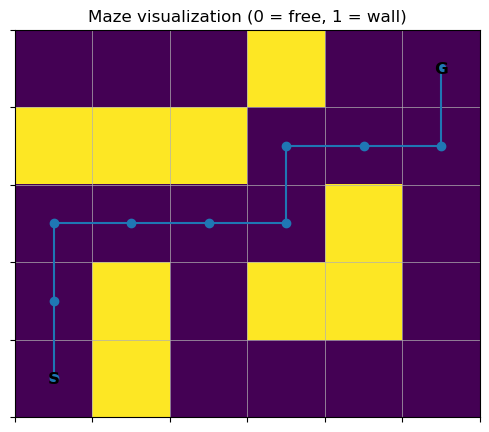

In [23]:
# Example maze: 0 = free cell, 1 = wall
maze = [
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0],
    [1, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
]

start = (0, 0)
goal  = (4, 5)

path = dijkstra(maze, start, goal)
if path:
    print("Shortest path found! Length (number of nodes):", len(path))
    print("Path (row, col):", path)
else:
    print("No path found from start to goal for this maze.")

visualize_maze(maze, path=path, start=start, goal=goal)


Random maze: No path found from start to goal.


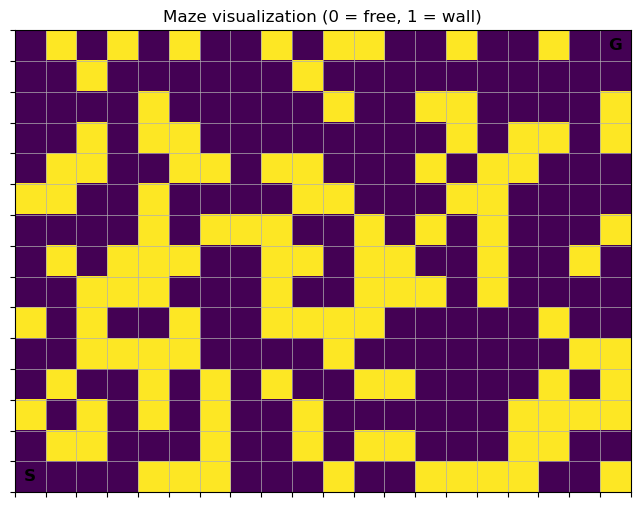

In [24]:
import random

def generate_random_maze(rows, cols, wall_prob=0.3, seed=None):
    """
    Create a random maze where each cell is wall with probability wall_prob.
    Ensures (0,0) and (rows-1, cols-1) are free.
    """
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)
    mat = (np.random.rand(rows, cols) < wall_prob).astype(int)
    mat[0,0] = 0
    mat[rows-1, cols-1] = 0
    return mat.tolist()

# Experiment: change these parameters
rows, cols = 15, 20
wall_prob = 0.35
seed = 42

random_maze = generate_random_maze(rows, cols, wall_prob=wall_prob, seed=seed)
start2 = (0,0)
goal2 = (rows-1, cols-1)

path2 = dijkstra(random_maze, start2, goal2)
if path2:
    print("Random maze: path length (nodes):", len(path2))
else:
    print("Random maze: No path found from start to goal.")

visualize_maze(random_maze, path=path2, start=start2, goal=goal2, figsize=(9,6))


# Interactive 

In [30]:
# Cell 2 — Configure interactive Matplotlib backend for Jupyter
# This tries to enable interactive notebook backend; if that fails it falls back to %matplotlib tk.
# Run this cell before any plotting cells.

try:
    # Preferred for Jupyter notebooks: interactive inline widget
    get_ipython().run_line_magic('matplotlib', 'notebook')
    print("Using %matplotlib notebook (interactive).")
except Exception as e:
    try:
        # Fallback to tk (this will open a separate window)
        get_ipython().run_line_magic('matplotlib', 'tk')
        print("Falling back to %matplotlib tk (external window).")
    except Exception:
        print("Couldn't change backend with magics. If you see a static image, try switching backend manually, or run the script as a .py file.")


Using %matplotlib notebook (interactive).


In [31]:
# Cell 3 — Imports, maze generator, and Dijkstra function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random, time, heapq

def generate_random_maze(rows, cols, wall_prob=0.3, seed=None):
    """Generate a random maze: 0 free, 1 wall. Ensure start & goal are free."""
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)
    m = (np.random.rand(rows, cols) < wall_prob).astype(int)
    m[0,0] = 0
    m[rows-1, cols-1] = 0
    return m

def dijkstra(maze, start, goal):
    """
    Dijkstra shortest path on grid maze.
    maze: numpy array (0 free, 1 blocked)
    start/goal: (r,c) tuples
    returns list of (r,c) from start to goal (inclusive). If unreachable,
    returns [start] or empty list if start==goal and trivial.
    """
    rows, cols = maze.shape
    directions = [(0,1),(1,0),(-1,0),(0,-1)]
    pq = [(0, start)]
    distances = {start:0}
    prev = {}

    while pq:
        cost, cur = heapq.heappop(pq)
        if cur == goal:
            break
        for dr, dc in directions:
            nr, nc = cur[0]+dr, cur[1]+dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr, nc] == 0:
                ncost = cost + 1
                if (nr,nc) not in distances or ncost < distances[(nr,nc)]:
                    distances[(nr,nc)] = ncost
                    prev[(nr,nc)] = cur
                    heapq.heappush(pq, (ncost, (nr,nc)))

    # Reconstruct path
    if start == goal:
        return [start]
    if goal not in prev:
        return []
    path = []
    node = goal
    while node != start:
        path.append(node)
        node = prev.get(node)
        if node is None:
            return []
    path.append(start)
    path.reverse()
    return path


In [32]:
# Cell 4 — InteractiveMaze class (core game)
class InteractiveMaze:
    def __init__(self, rows=10, cols=15, wall_prob=0.3, level="Easy"):
        self.rows = rows
        self.cols = cols
        self.level = level
        self.wall_prob = wall_prob
        self.maze = generate_random_maze(rows, cols, wall_prob)
        self.player_pos = [0,0]
        self.goal_pos = [rows-1, cols-1]
        self.fig, self.ax = plt.subplots(figsize=(7,6))
        self.cid = None
        self.start_time = None
        self.moves = 0
        self.hint_path = None
        self._draw_maze()

    def _draw_maze(self, show_hint=False):
        self.ax.clear()
        # Draw maze: 0 -> white, 1 -> black (binary colormap)
        self.ax.imshow(self.maze, cmap="binary", origin="upper")

        # Player (blue circle)
        py, px = self.player_pos
        self.ax.add_patch(patches.Circle((px, py), 0.3, color="blue", zorder=5))

        # Goal (green square)
        gy, gx = self.goal_pos
        self.ax.add_patch(patches.Rectangle((gx-0.3, gy-0.3), 0.6, 0.6, color="green", zorder=4))

        # Hint overlay if requested
        if show_hint and self.hint_path:
            for (r,c) in self.hint_path:
                self.ax.add_patch(patches.Rectangle((c-0.3, r-0.3), 0.6, 0.6, color="yellow", alpha=0.4, zorder=3))

        elapsed = 0 if self.start_time is None else round(time.time() - self.start_time, 1)
        self.ax.set_title(f"🎮 {self.level} | Moves: {self.moves} | Time: {elapsed}s | Use Arrows/WASD | H=Hint | R=Restart")

        # Grid for clarity
        self.ax.set_xticks(np.arange(-0.5, self.cols, 1))
        self.ax.set_yticks(np.arange(-0.5, self.rows, 1))
        self.ax.grid(True, linewidth=0.5)
        self.ax.set_xticklabels([])
        self.ax.set_yticklabels([])
        self.fig.canvas.draw_idle()

    def _is_valid(self, r, c):
        return 0 <= r < self.rows and 0 <= c < self.cols and self.maze[r, c] == 0

    def _on_key(self, event):
        key = event.key.lower()
        # start timer on first key
        if self.start_time is None:
            self.start_time = time.time()

        r, c = self.player_pos
        if key in ["w", "up"]:
            new_pos = [r-1, c]
        elif key in ["s", "down"]:
            new_pos = [r+1, c]
        elif key in ["a", "left"]:
            new_pos = [r, c-1]
        elif key in ["d", "right"]:
            new_pos = [r, c+1]
        elif key == "r":
            # restart same difficulty
            plt.close(self.fig)
            play_interactive_maze(self.level)
            return
        elif key == "h":
            # compute hint from current player to goal
            self.hint_path = dijkstra(self.maze, tuple(self.player_pos), tuple(self.goal_pos))
            self._draw_maze(show_hint=True)
            return
        else:
            return  # ignore other keys

        if self._is_valid(*new_pos):
            self.player_pos = new_pos
            self.moves += 1
            self.hint_path = None  # clear previous hint when player moves
            self._draw_maze()
            self._check_goal()

    def _check_goal(self):
        if self.player_pos == self.goal_pos:
            elapsed = round(time.time() - self.start_time, 1) if self.start_time else 0
            self.ax.set_title(f"🎉 You won in {self.moves} moves and {elapsed}s! Generating new maze...")
            self.fig.canvas.draw_idle()
            # disconnect events and wait briefly then auto-regenerate
            if self.cid:
                try:
                    self.fig.canvas.mpl_disconnect(self.cid)
                except Exception:
                    pass
            plt.pause(1.2)
            plt.close(self.fig)
            # auto-regenerate same difficulty
            play_interactive_maze(self.level)

    def start(self):
        # connect key press event and show
        self.cid = self.fig.canvas.mpl_connect("key_press_event", self._on_key)
        plt.show()


In [33]:
# Cell 5 — Launcher function and call
def play_interactive_maze(level="Easy"):
    """
    level: "Easy", "Medium", "Hard" (case-insensitive)
    Easy: smaller grid, fewer walls
    """
    lvl = level.lower()
    if lvl == "easy":
        wall_prob, size = 0.25, (10, 15)
    elif lvl == "medium":
        wall_prob, size = 0.35, (15, 20)
    elif lvl == "hard":
        wall_prob, size = 0.45, (20, 25)
    else:
        wall_prob, size = 0.3, (10, 15)

    rows, cols = size
    print(f"Starting {level.capitalize()} Maze — size {rows}x{cols}, wall_prob={wall_prob}")
    game = InteractiveMaze(rows=rows, cols=cols, wall_prob=wall_prob, level=level.capitalize())
    game.start()

# Run the game: change "Easy" to "Medium" or "Hard" as desired
play_interactive_maze("Easy")


Starting Easy Maze — size 10x15, wall_prob=0.25


<IPython.core.display.Javascript object>